       sepal length   sepal width   petal length   petal width
count    150.000000    150.000000     150.000000    150.000000
mean       5.843333      3.054000       3.758667      1.198667
std        0.828066      0.433594       1.764420      0.763161
min        4.300000      2.000000       1.000000      0.100000
25%        5.100000      2.800000       1.600000      0.300000
50%        5.800000      3.000000       4.350000      1.300000
75%        6.400000      3.300000       5.100000      1.800000
max        7.900000      4.400000       6.900000      2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal length   150 non-null    float64
 1    sepal width   150 non-null    float64
 2    petal length  150 non-null    float64
 3    petal width   150 non-null    float64
 4    class         150 non-null    object 
dtypes: float64(4), o

<Figure size 432x288 with 0 Axes>

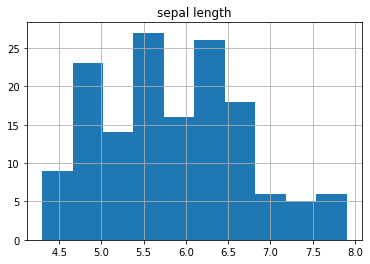

<Figure size 432x288 with 0 Axes>

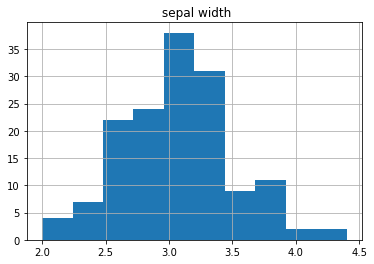

<Figure size 432x288 with 0 Axes>

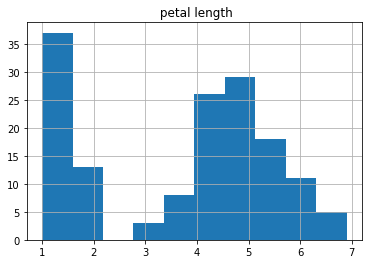

<Figure size 432x288 with 0 Axes>

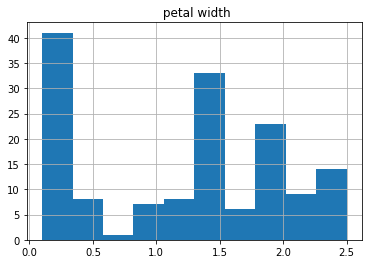

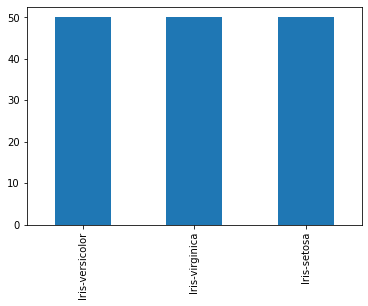

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

# # 1.1 a)
df = pd.read_csv("iris.csv")
# # 1.1 b)
print(df.describe())
print(df.info())

# 1.1 c)
print(df.nunique())
for x in df:
    if(x == ' class'):
        plt.figure()
        df[x].value_counts().plot(kind='bar')
    else:
        plt.figure()
        df.hist([x])


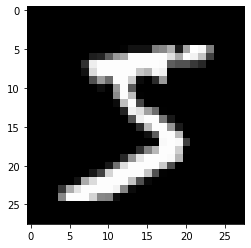

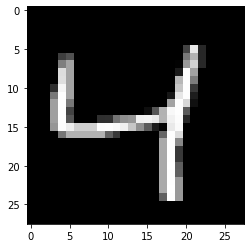

c:\users\utkri\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


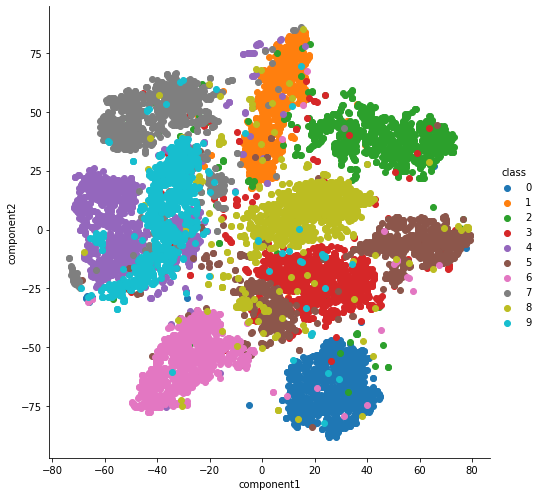

In [2]:
# # 1.2 a)
import idx2numpy
import matplotlib.pyplot as plt
# Reading
ndarr = idx2numpy.convert_from_file('train-images.idx3-ubyte')
y =  idx2numpy.convert_from_file('train-labels.idx1-ubyte')
# # 1.2 b)
   
# plt.subplot(330 + 1 + 0)
plt.imshow(ndarr[0], cmap=plt.get_cmap('gray'))
plt.show()

# plt.subplot(330 + 1 + 2)
plt.imshow(ndarr[2], cmap=plt.get_cmap('gray'))
plt.show()

# # 1.2 c)
import pandas as pd
import numpy as np
import seaborn as sns
 
seed = 0
from sklearn.manifold import TSNE
ndarr = ndarr.reshape(len(ndarr), 784)
sample = []
for i in range(10):
    sample.append([])
lenn = len(y)
for i in range(lenn):
    sample[y[i]].append(i)
li = []
for i in range(10):
    li.extend(sample[i][:1000])
newndarr = []
newy = []
for i in li:
    newndarr.append(ndarr[i])
    newy.append(y[i])

ndarr = np.array(newndarr)
y = np.array(newy)
ret = TSNE(init = 'random',n_iter = 1000,random_state = seed, learning_rate='auto'  ).fit_transform(ndarr)
ret = np.vstack((ret.T, y)).T
df = pd.DataFrame( columns=("component1", "component2", "class"), data=ret)
df['class'] = df['class'].astype(int)

sns.FacetGrid(df, hue="class", size = 7).map(plt.scatter, 'component1', 'component2').add_legend()

<Figure size 432x288 with 0 Axes>

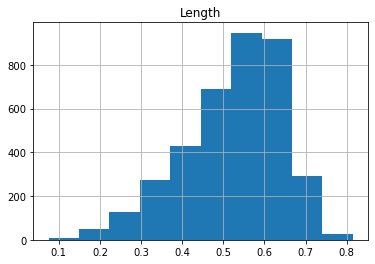

<Figure size 432x288 with 0 Axes>

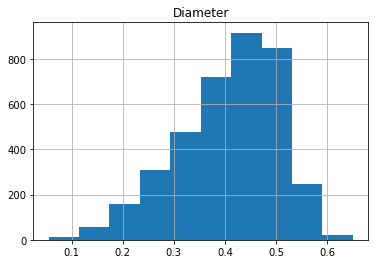

<Figure size 432x288 with 0 Axes>

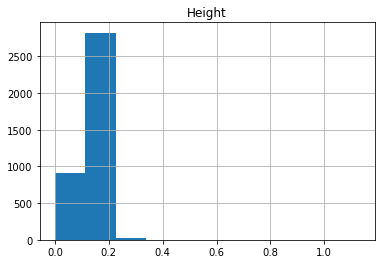

<Figure size 432x288 with 0 Axes>

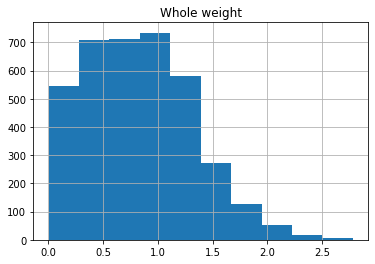

<Figure size 432x288 with 0 Axes>

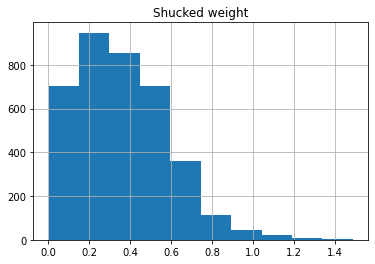

<Figure size 432x288 with 0 Axes>

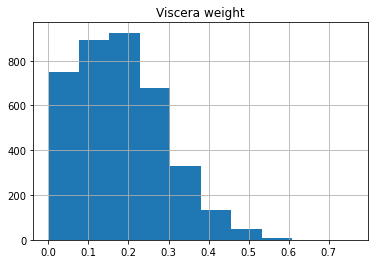

<Figure size 432x288 with 0 Axes>

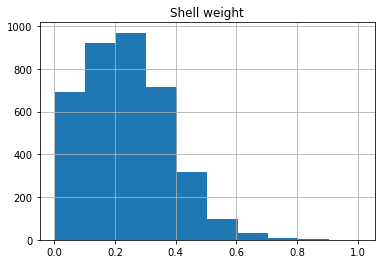

In [9]:
# dataset taken from https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/

import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# # 2.1
RS = 0
  
X =  pd.read_csv("abaloneX.csv")
#creating dummy variables
gender = X['Gender']
dummydf = pd.get_dummies(gender)
dummydf.drop(columns=['I'], inplace=True)
X.drop(columns=['Gender'], inplace=True)
X = pd.concat([dummydf, X], axis=1)

y =  pd.read_csv("abaloney.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = RS)

for x in X_train:
    if((x!= 'M') and (x!= 'F')):
        plt.figure()
        X_train.hist([x])
        
columns = X_train.columns
# normalising
norm = MinMaxScaler().fit(X_train)
X_train[:] = norm.transform(X_train)
X_test[:] = norm.transform(X_test)

# y_train = y_train.to_numpy()
# y_test = y_test.to_numpy()

# X_train = pd.DataFrame(X_train, columns = columns)
# X_test = pd.DataFrame(X_test, columns = columns)

 


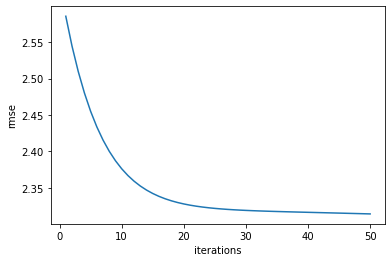

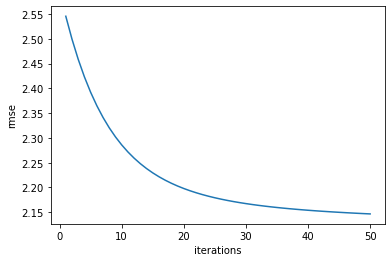

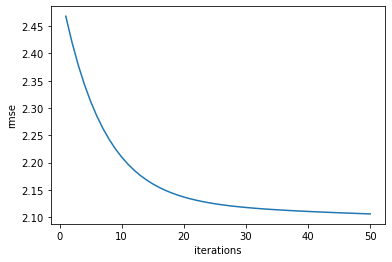

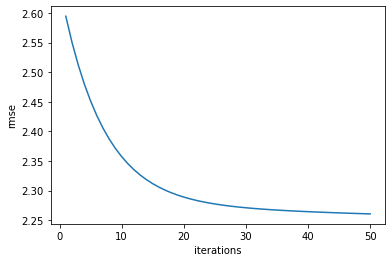

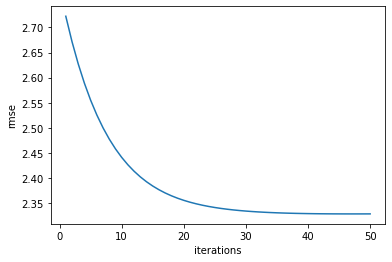

In [10]:
# # 2.1 a)
from copy import deepcopy
import numpy as np
def predict(x, para):
    predd = deepcopy(para[0])
    sizee = len(x)
    for val in range(sizee-1):
        predd = predd + (para[1+val] * x[val])       
    return predd

def coefficients_sgd(train, l_rate, n_epoch, lambdaa, regular):
    train = train.to_numpy()
    w = np.zeros(train.shape[1] )
    listcoef = []
    leng = len(train)
    for i in range(n_epoch):
        for j in range(leng):
            x = train[j]
            x = np.concatenate([np.array([1]), x])
            yhat = np.dot(x[:-1].T,w)
            diff = yhat - x[-1]
            if(regular == 'default'):
                delta = (x[:-1]*diff)
            elif(regular == 'lasso'):
                onesw = deepcopy(w)
                for k in range(len(onesw)):
                    if onesw[k] > 0:
                        onesw[k] = 1
                    else:
                        onesw[k] = -1
                delta = (x[:-1]*diff) + ( onesw * lambdaa)
            elif(regular == 'ridge'):
                delta = (x[:-1]*diff) + (2 * w * lambdaa)
            else:
                print("error in regular parameter")
                return 
            w = w - l_rate*delta
        listcoef.append(deepcopy(w.T.tolist()))   
    return listcoef 

def calrmse(listcoef, test):# listcoef should be a list of list of coefficients. coef should also be a list of coefficients
    leng = len(test)
    rmselist = list()
#     print(type(listcoef))
    for coef in listcoef:
#         print(type(coef))
        mus = 0
        for i in range(leng):
            sample = test.iloc[i].to_numpy()
            yhat = predict(sample, coef)
            mus += (yhat - sample[-1])**2
        mus /= leng
        rmselist.append(pow(mus, 0.5))
    return rmselist

def plotgraph(rmselist):
    x=[i for i in range(1, len(rmselist) + 1)] 
    plt.plot(x, rmselist)
    plt.xlabel('iterations')
    plt.ylabel('rmse')
#     plt.xscale('linear')
    twoaxis = plt.gca()
#     twoaxis.set_xlim([xmin, xmax])
#     twoaxis.set_ylim([min(rmselist) - 0.001, max(rmselist) + 0.001])

#     plt.set_ylim([10,30])
#     plt.xscale('linear')
    plt.show()
kf = KFold(n_splits = 5)
bestmodels = []
# print(X_train)
# print(y_train)
 
currmse = 10000
bestmodels.append(None)
for train_index, test_index in kf.split(X_train):
    X_vtrain, X_vtest = X_train.iloc[train_index], X_train.iloc[test_index]
    y_vtrain, y_vtest = y_train.iloc[train_index], y_train.iloc[test_index]
    train = pd.concat([X_vtrain, y_vtrain], axis=1)
    test = pd.concat([X_vtest, y_vtest], axis=1)
    rmselist = list()
    listcoef = coefficients_sgd(train, 0.01, 50, -1, 'default')  
    rmselist = calrmse(listcoef, test)
    lenn = len(listcoef)
    for j in range(lenn):
        if(currmse > rmselist[j]):
            currmse = rmselist[j]
            bestmodels.pop()
            bestmodels.append(listcoef[j])
            
    plotgraph(rmselist) 

    

[4.881075987603486, 1.0585730665885111, 1.0390745405638566, 2.9457813698929156, 3.1220846948909, -0.00404263722187931, 0.9544507220843601, -0.0411095651153604, 0.04864583911043254, 1.830517394610085]


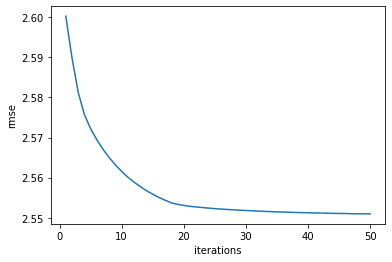

[4.8417831968680245, 1.0446432785734325, 1.0254316041787221, 3.0410259388578638, 3.179898397459192, -0.0038826283880543854, 0.8699215091126202, -0.04083417939897485, 0.10641113371920184, 1.6992209625639598]


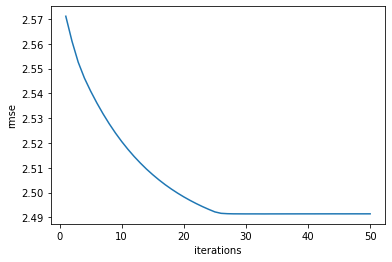

[4.885508721367193, 1.0747755544057958, 1.0536864526249043, 2.9572523779760904, 3.122165141863825, -0.0038940985250906003, 0.8925769785557776, -0.0410790626973305, 0.09334378725903872, 1.774910414546847]


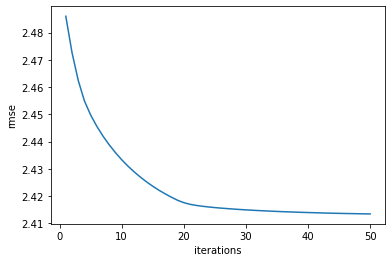

[4.888965192554332, 1.1530418132343732, 1.0811289804282862, 2.9549375350683356, 3.09043951982962, -0.003963793399625266, 0.8818707632568321, -0.04154570587721233, 0.04474394607139309, 1.748559433304828]


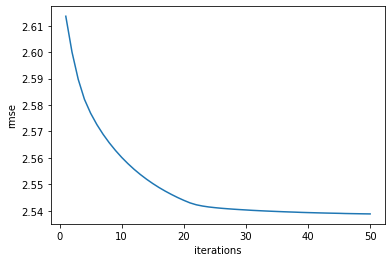

[5.119920805980818, 0.9944295637698192, 1.2859812658269019, 3.0950157669091563, 3.250053027451783, 0.016759897767381304, 0.9778727179304348, 0.016810480474876464, 0.12691654784249928, 1.7348797279519228]


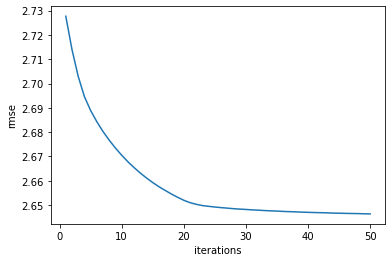

In [11]:
# # 2.1 b)
currmse = 10000
bestmodels.append(None)
for train_index, test_index in kf.split(X_train):
    X_vtrain, X_vtest = X_train.iloc[train_index], X_train.iloc[test_index]
    y_vtrain, y_vtest = y_train.iloc[train_index], y_train.iloc[test_index]
    train = pd.concat([X_vtrain, y_vtrain], axis=1)
    test = pd.concat([X_vtest, y_vtest], axis=1)
    rmselist = list()
    listcoef = coefficients_sgd(train, 0.01, 50, 0.05, 'lasso')  
    print(listcoef[0])
    rmselist = calrmse(listcoef, test)
    lenn = len(listcoef)
    for j in range(lenn):
        if(currmse > rmselist[j]):
            currmse = rmselist[j]
            bestmodels.pop()
            bestmodels.append(listcoef[j])
    plotgraph(rmselist) 
     
    

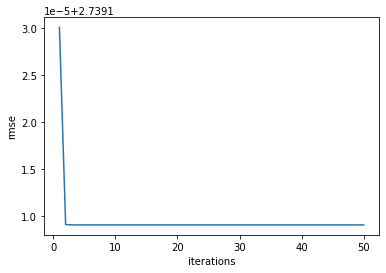

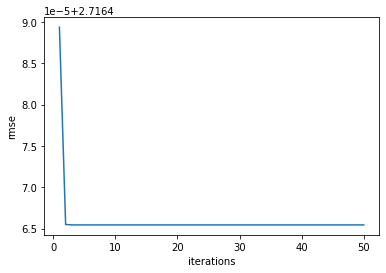

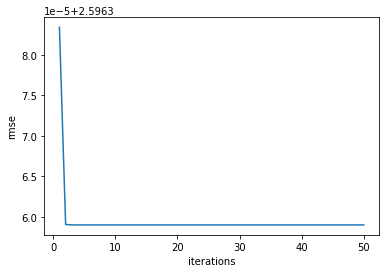

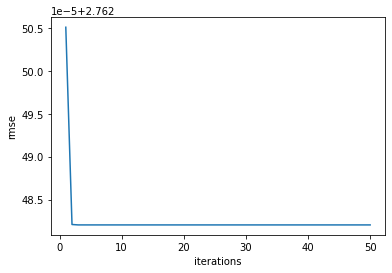

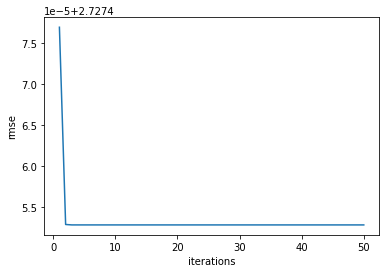

In [12]:
currmse = 10000
bestmodels.append(None)
for train_index, test_index in kf.split(X_train):
    X_vtrain, X_vtest = X_train.iloc[train_index], X_train.iloc[test_index]
    y_vtrain, y_vtest = y_train.iloc[train_index], y_train.iloc[test_index]
    train = pd.concat([X_vtrain, y_vtrain], axis=1)
    test = pd.concat([X_vtest, y_vtest], axis=1)
    rmselist = list()
    listcoef = coefficients_sgd(train, 0.01, 50, 0.1, 'ridge')  
#     print(listcoef[0])
    rmselist = calrmse(listcoef, test)
    lenn = len(listcoef)
    for j in range(lenn):
        if(currmse > rmselist[j]):
            currmse = rmselist[j]
            bestmodels.pop()
            bestmodels.append(listcoef[j])
    plotgraph(rmselist) 

In [13]:
# # 2.1 c)
testsetaccuracy = calrmse(bestmodels, pd.concat([X_test, y_test], axis=1))
print("Only regression:" + str(testsetaccuracy[0]))
print("Regression + L1:" + str(testsetaccuracy[1]))
print("Regression + L2:" + str(testsetaccuracy[2]))

Only regression:2.229905034447438
Regression + L1:2.5259402133458098
Regression + L2:2.7411245181708117


In [14]:
# # 2.1 d)
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error
bestmodels = []

currmse = 10000
bestmodels.append(None)

for train_index, test_index in kf.split(X_train):
    X_vtrain, X_vtest = X_train.iloc[train_index], X_train.iloc[test_index]
    y_vtrain, y_vtest = y_train.iloc[train_index], y_train.iloc[test_index]
    train = pd.concat([X_vtrain, y_vtrain], axis=1)
    test = pd.concat([X_vtest, y_vtest], axis=1)
    model = LinearRegression()
    
#     print(X_vtrain.to_numpy().shape)
#     print(y_vtrain.to_numpy().ravel().shape)
    model.fit(X_vtrain.to_numpy(), y_vtrain.to_numpy().ravel())
    yhats = model.predict(X_vtest.to_numpy())
    leng = len(yhats)
    sum_error = 0
    for i in range(leng):
        row = test.iloc[i].to_numpy()
         
        sum_error += (yhats[i] - row[-1])**2
    sum_error /= leng
    sum_error = pow(sum_error, 0.5)
    calscore = sum_error    
    if(currmse > calscore):
        currmse = calscore
        bestmodels.pop()
        bestmodels.append(model)
#     testaccuracy = mean_squared_error(y_vtest, yhats) 

currmse = 10000
bestmodels.append(None)
for train_index, test_index in kf.split(X_train):
    X_vtrain, X_vtest = X_train.iloc[train_index], X_train.iloc[test_index]
    y_vtrain, y_vtest = y_train.iloc[train_index], y_train.iloc[test_index]
    train = pd.concat([X_vtrain, y_vtrain], axis=1)
    test = pd.concat([X_vtest, y_vtest], axis=1)
    alphas = [0.005, 0.01, 0.05, 0.1, 0.5, 1]
    for alp in alphas:
        
        model = Lasso(    alpha = alp, max_iter = 50,   random_state = RS )
        model.fit(X_vtrain.to_numpy(), y_vtrain.to_numpy().ravel())
        yhats = model.predict(X_vtest.to_numpy())
       
        sum_error = pow(mean_squared_error(yhats, y_vtest ), 0.5)
        calscore = sum_error    
        if(currmse > calscore):
            currmse = calscore
            bestmodels.pop()
            bestmodels.append(model)
            
currmse = 10000
bestmodels.append(None)
for train_index, test_index in kf.split(X_train):
    X_vtrain, X_vtest = X_train.iloc[train_index], X_train.iloc[test_index]
    y_vtrain, y_vtest = y_train.iloc[train_index], y_train.iloc[test_index]
    train = pd.concat([X_vtrain, y_vtrain], axis=1)
    test = pd.concat([X_vtest, y_vtest], axis=1)
    alphas = [0.005, 0.01, 0.05, 0.1, 0.5, 1] # alpha = 1/(2C) where C = 1/regul. parameter
    for alp in alphas:
        
        model = Ridge( solver = 'sag',  alpha = alp, max_iter = 50,   random_state = RS )
        model.fit(X_vtrain.to_numpy(), y_vtrain.to_numpy().ravel())
        yhats = model.predict(X_vtest.to_numpy())
       
        sum_error = pow(mean_squared_error(yhats, y_vtest ), 0.5)
        calscore = sum_error    
        if(currmse > calscore):
            currmse = calscore
            bestmodels.pop()
            bestmodels.append(model)
    #     testaccuracy = mean_squared_error(y_vtest, yhats)    
     
len(bestmodels)

 




c:\users\utkri\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.356e+02, tolerance: 3.095e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\utkri\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.746e+02, tolerance: 3.126e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\utkri\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

3

In [15]:
yhats = bestmodels[0].predict(X_test.to_numpy())
print(bestmodels[0].coef_)
mse = mean_squared_error(y_test, yhats) 
print("Only regression:" + str(pow(mse,0.5)))
yhats = bestmodels[1].predict(X_test.to_numpy())
print(bestmodels[1].coef_)
mse = mean_squared_error(y_test, yhats) 
print("Regression + L1:" + str(pow(mse,0.5)))
yhats = bestmodels[2].predict(X_test.to_numpy())
print(bestmodels[2].coef_)
mse = mean_squared_error(y_test, yhats) 
print("Regression + L2:" + str(pow(mse,0.5)))

[  0.86401599   0.90307784  -0.30659232   6.77621141   9.22647174
  24.79666007 -29.65376485  -7.66108925   8.99259996]
Only regression:2.2153560444485416
[  0.95133147   0.93742494   0.50346367   6.17538244   0.43354929
   1.56404077 -16.00911484  -0.          18.36009242]
Regression + L1:2.261487584471113
[  0.86625705   0.90285202  -0.28651736   6.76819575   9.20667361
  24.51389086 -29.50279218  -7.5866887    9.1183723 ]
Regression + L2:2.2150813085706984


In [17]:
# # 2.1 e)
for train_index, test_index in kf.split(X_train):
    X_vtrain, X_vtest = X_train.iloc[train_index], X_train.iloc[test_index]
    y_vtrain, y_vtest = y_train.iloc[train_index], y_train.iloc[test_index]
    X_vtrain.insert(0, "colA", [1]*len(X_vtrain))
    X_vtrain = X_vtrain.to_numpy()
    y_vtrain = y_vtrain.to_numpy()
    test = pd.concat([X_vtest, y_vtest], axis=1)
#     print("test")
#     print(test)
    inverseterm = np.linalg.inv(np.dot(X_vtrain.T, X_vtrain))
#     print("inverseterm")
#     print(inverseterm)
#     print("np.dot(X_vtrain.T, y_vtrain)")
#     print(np.dot(X_vtrain.T, y_vtrain))
    w = np.dot( inverseterm, np.dot(X_vtrain.T, y_vtrain) )
    wlist = []
    for i in w:
        wlist.append(i[0])
#     print(wlist)
    print(calrmse([wlist], test))


[2.2811790641396854]
[2.125647819353217]
[2.0622138414770057]
[2.2360709260892904]
[2.382174732152631]


   independent variable      mean       var
0              feature2  0.000000  0.000000
1              feature1  0.892063  0.096593
2              feature4  0.034643  0.191194
3              feature6  0.113384  0.208050
4             feature16  0.065298  0.215039
5             feature34  0.008301  0.223230
6             feature12  0.146270  0.235639
7             feature18  0.000599  0.236142
8              feature7  0.558050  0.236260
9             feature10  0.185350  0.237055
10            feature30 -0.036432  0.242616
11            feature14  0.103843  0.244909
12            feature26 -0.071186  0.254410
13            feature32 -0.008864  0.256160
14             feature5  0.605524  0.258097
15             feature9  0.508289  0.258854
16             feature3  0.630818  0.260203
17            feature20 -0.019576  0.264701
18            feature27  0.542204  0.270699
19            feature33  0.367381  0.272289
20            feature22  0.010754  0.273677
21             feature8  0.11812

<Figure size 432x288 with 0 Axes>

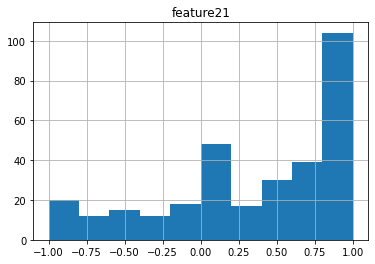

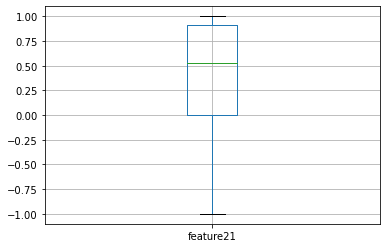

<Figure size 432x288 with 0 Axes>

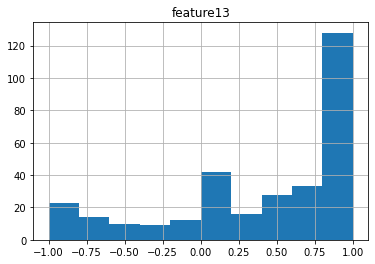

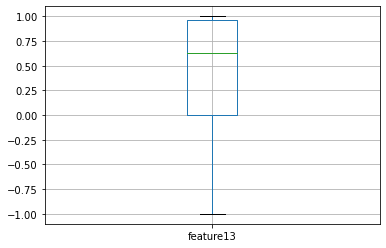

<Figure size 432x288 with 0 Axes>

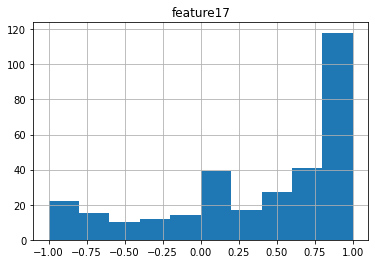

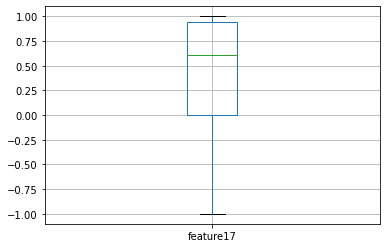

<Figure size 432x288 with 0 Axes>

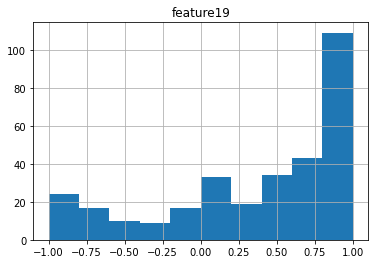

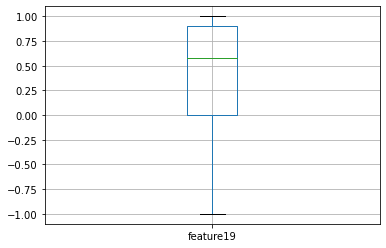

<Figure size 432x288 with 0 Axes>

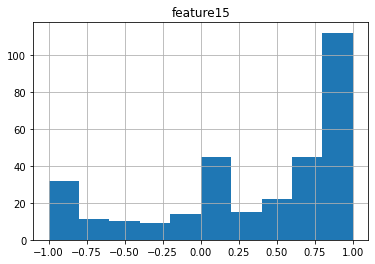

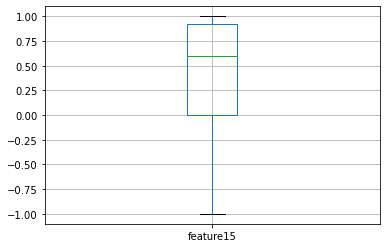

In [31]:
# # 3.1
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

def comp(x):
    return x[2]
X = pd.read_csv("ionosphere_data_kaggleX.csv")
RS = 0
y =  pd.read_csv("ionosphere_data_kaggley.csv")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = RS)

features = []
for x in X_train:
    features.append((x,X_train[x].mean(), pow(X_train[x].std(),2)))
features = sorted(features, key = comp)
print(pd.DataFrame( columns=("independent variable", "mean", "var"), data=features))

top5 = ['feature21', 'feature13', 'feature17', 'feature19','feature15']
for i in top5:
    plt.figure()
    X_train.hist([i])
    plt.figure()
    X_train.boxplot(column = [i])
    
columns = X_train.columns
# normalising
norm = MinMaxScaler().fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)



In [32]:
# # 3.1 and 3.1 b)
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
bestmodels = []
co = 1
for train_index, test_index in kf.split(X_train):
    X_vtrain, X_vtest = X_train.iloc[train_index], X_train.iloc[test_index]
    y_vtrain, y_vtest = y_train.iloc[train_index], y_train.iloc[test_index]
    X_vtrain = X_vtrain.to_numpy()
    y_vtrain = y_vtrain.to_numpy()
    X_vtest = X_vtest.to_numpy()
    y_vtest = y_vtest.to_numpy()
    clf = SGDClassifier(loss = 'log', penalty = 'l1', alpha = 0, eta0 = 0.01,  random_state=RS, learning_rate = 'constant').fit(X_vtrain, y_vtrain.ravel())
    yhats = clf.predict(X_vtest)
    a = precision_recall_fscore_support(y_vtest, yhats,   average='binary', pos_label = 'g', labels = ['g', 'b'])
    b = accuracy_score(y_vtest, yhats)
    li = list(a)
    li[3] = b
    tu = tuple(li)
    print("precision:%f recall:%f f1score:%f accuracy:%f" %tu)
    if(co == 3):
        bestmodels.append(clf)
    co += 1
    #     clf2 = SGDClassifier(penalty = 'l1', C = 1, solver = 'saga', random_state=RS).fit(X_vtrain, y_vtrain.ravel())
#     clf3 = SGDClassifier(penalty = 'l2', C = 1, solver = 'saga', random_state=RS).fit(X_vtrain, y_vtrain.ravel())
   
#     print(yhats)
#     print(y_vtest.ravel())
 
# for model in bestmodels:
#     predictedlabels = model.predict(X_test.to_numpy())
#     a = precision_recall_fscore_support(y_test, predictedlabels, average='weighted', pos_label = 'g', labels = ['g','b'])
# #     print(a)
#     print("precision:%f recall:%f f1score:%f" %tuple(a[:-1]))
len(bestmodels)

precision:0.833333 recall:1.000000 f1score:0.909091 accuracy:0.888889
precision:0.755102 recall:1.000000 f1score:0.860465 accuracy:0.809524
precision:0.860465 recall:1.000000 f1score:0.925000 accuracy:0.904762
precision:0.851852 recall:0.978723 f1score:0.910891 accuracy:0.857143
precision:0.851852 recall:0.978723 f1score:0.910891 accuracy:0.857143


1

In [33]:
co=1
for train_index, test_index in kf.split(X_train):
    X_vtrain, X_vtest = X_train.iloc[train_index], X_train.iloc[test_index]
    y_vtrain, y_vtest = y_train.iloc[train_index], y_train.iloc[test_index]
    X_vtrain = X_vtrain.to_numpy()
    y_vtrain = y_vtrain.to_numpy()
    X_vtest = X_vtest.to_numpy()
    y_vtest = y_vtest.to_numpy()
    alphas = [ 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
    models = []
    models.append(None)
    f1 = -1
    for al in alphas:
        clf = SGDClassifier(loss = 'log', penalty = 'l1', alpha = al, eta0 = 0.01,  random_state=RS, learning_rate = 'constant').fit(X_vtrain, y_vtrain.ravel())
        yhats = clf.predict(X_vtest)
        a = precision_recall_fscore_support(y_vtest, yhats, average='binary', pos_label = 'g', labels = ['g', 'b'] )
        b = accuracy_score(y_vtest, yhats)
        li = list(a)
        li[3] = b
        tu = tuple(li)
        if( tu[2] > f1):
            f1 = tu[2]
            models.pop()
            models.append(clf)
    yhats = models[-1].predict(X_vtest)
    a = precision_recall_fscore_support(y_vtest, yhats,  average='binary', pos_label = 'g', labels = ['g', 'b'] )
    b = accuracy_score(y_vtest, yhats)
    li = list(a)
    li[3] = b
    tu = tuple(li)
    print("precision:%f recall:%f f1score:%f accuracy:%f" %tu)
    if(co == 5):
        bestmodels.append(models[-1])
    co += 1
    

len(bestmodels)

precision:0.555556 recall:1.000000 f1score:0.714286 accuracy:0.555556
precision:0.587302 recall:1.000000 f1score:0.740000 accuracy:0.587302
precision:0.596774 recall:1.000000 f1score:0.747475 accuracy:0.603175
precision:0.758065 recall:1.000000 f1score:0.862385 accuracy:0.761905
precision:0.770492 recall:1.000000 f1score:0.870370 accuracy:0.777778


2

In [34]:
co = 1
for train_index, test_index in kf.split(X_train):
    X_vtrain, X_vtest = X_train.iloc[train_index], X_train.iloc[test_index]
    y_vtrain, y_vtest = y_train.iloc[train_index], y_train.iloc[test_index]
    X_vtrain = X_vtrain.to_numpy()
    y_vtrain = y_vtrain.to_numpy()
    X_vtest = X_vtest.to_numpy()
    y_vtest = y_vtest.to_numpy()
    alphas = [ 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
    models = []
    models.append(None)
    f1 = -1
    for al in alphas:
        clf = SGDClassifier(loss = 'log', penalty = 'l2', alpha = al, eta0 = 0.01,  random_state=RS, learning_rate = 'constant').fit(X_vtrain, y_vtrain.ravel())
        yhats = clf.predict(X_vtest)
        a = precision_recall_fscore_support(y_vtest, yhats, average='binary', pos_label = 'g', labels = ['g', 'b'] )
        b = accuracy_score(y_vtest, yhats)
        li = list(a)
        li[3] = b
        tu = tuple(li)
        if( tu[2] > f1):
            f1 = tu[2]
            models.pop()
            models.append(clf)
    yhats = models[-1].predict(X_vtest)
    a = precision_recall_fscore_support(y_vtest, yhats,  average='binary', pos_label = 'g', labels = ['g', 'b'] )
    b = accuracy_score(y_vtest, yhats)
    li = list(a)
    li[3] = b
    tu = tuple(li)
    print("precision:%f recall:%f f1score:%f accuracy:%f" %tu)
    if(co == 5):
        bestmodels.append(models[-1])
    co += 1
len(bestmodels)
    

precision:0.648148 recall:1.000000 f1score:0.786517 accuracy:0.698413
precision:0.637931 recall:1.000000 f1score:0.778947 accuracy:0.666667
precision:0.740000 recall:1.000000 f1score:0.850575 accuracy:0.793651
precision:0.796610 recall:1.000000 f1score:0.886792 accuracy:0.809524
precision:0.839286 recall:1.000000 f1score:0.912621 accuracy:0.857143


3

In [35]:

for i in bestmodels:
    yhats = i.predict(X_test)
    a = precision_recall_fscore_support(y_test, yhats,  average='binary', pos_label = 'g', labels = ['g', 'b'] )
    b = accuracy_score(y_test, yhats)
    li = list(a)
    li[3] = b
    tu = tuple(li)
    print("precision:%f recall:%f f1score:%f accuracy:%f" %tu)

precision:0.880000 recall:1.000000 f1score:0.936170 accuracy:0.916667
precision:0.687500 recall:1.000000 f1score:0.814815 accuracy:0.722222
precision:0.785714 recall:1.000000 f1score:0.880000 accuracy:0.833333


c:\users\utkri\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
c:\users\utkri\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
c:\users\utkri\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


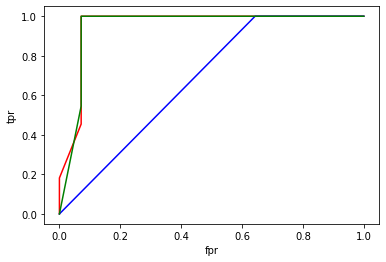

In [37]:
# # 3.1 c)
from sklearn.metrics import confusion_matrix,recall_score
def plotroc(tpr, fpr, color):
    # importing the required module
    import matplotlib.pyplot as plt
     
    # y axis values
    # tpr = []
    # corresponding x axis values
    # fpr = []
     
    # plotting the points
    plt.plot( fpr,tpr, color)
     
    # naming the x axis
    plt.xlabel('fpr')
    # naming the y axis
    plt.ylabel('tpr')
      
     
    # function to show the plot
#     plt.show()
def my_confmat(y_test, y_pred):
    tp, fn = 0, 0
    fp, tn = 0, 0
    for i in range(len(y_test)):
        if(y_test[i] == 'g'):
            if(y_pred[i] == 'g'):
                tp += 1
            else:
                fn += 1
        else:
            if(y_pred[i] == 'g'):
                fp +=1
            else:
                tn +=1
    return [[tp, fn], [fp, tn]]
    
    
color = ['r', 'b', 'g']
countcolor = 0
for model in bestmodels:
    threshold = 0
    tpr = []
    fpr = []
    prob = model.predict_proba(X_test.to_numpy() )
    
#     break;
    for _ in range(11):
        y_pred = []
        for i in prob:
            if(i[1] > threshold):
                y_pred.append('g')
            else:
                y_pred.append('b')
        matrix = my_confmat(y_test.to_numpy(), y_pred)
        FPR = matrix[1][0]/(matrix[1][1]+matrix[1][0])
        TPR =   matrix[0][0]/(matrix[0][0]+matrix[0][1])
#         TPR = recall_score(y_test, y_pred, average='binary', pos_label = 'g', labels = ['g','b']) 
#         matrix = confusion_matrix(y_test, y_pred,   labels = ['g','b'])
#         FPR = matrix[1][0]/(matrix[1][1]+matrix[1][0])
        tpr.append(TPR)
        fpr.append(FPR)
        threshold += 0.1
    plotroc(tpr, fpr, color[countcolor])
    countcolor += 1
plt.show()
    

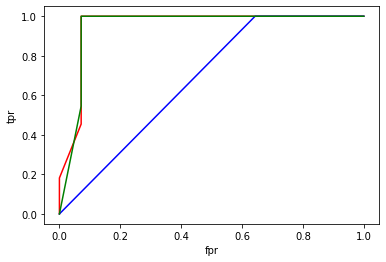

In [38]:
# # 3.1 d)
countcolor = 0
for model in bestmodels:
    threshold = 0
    tpr = []
    fpr = []
    prob = model.predict_proba(X_test.to_numpy() )
    
#     break;
    for _ in range(11):
        y_pred = []
        for i in prob:
            if(i[1] > threshold):
                y_pred.append('g')
            else:
                y_pred.append('b')
        TPR = recall_score(y_test, y_pred, average='binary', pos_label = 'g', labels = ['g','b']) 
        matrix = confusion_matrix(y_test, y_pred,   labels = ['g','b'])
        FPR = matrix[1][0]/(matrix[1][1]+matrix[1][0])
        tpr.append(TPR)
        fpr.append(FPR)
        threshold += 0.1
    plotroc(tpr, fpr, color[countcolor])
    countcolor += 1
plt.show()

In [42]:
# # 3.2 a)
import idx2numpy
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsOneClassifier
import pandas as pd 
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score


def score(y_test, predictedlabels):
    a = precision_recall_fscore_support(y_test, predictedlabels, average='micro', pos_label = 'g')
    b = accuracy_score(y_test, predictedlabels)
    li = list(a)
    li[3] = b
    tu = tuple(li)
    print("precision:%f recall:%f f1score:%f accuracy:%f" %tu)
    
RS = 0
notebookpath = "/content/drive/MyDrive/Colab Notebooks/"
ndarr = idx2numpy.convert_from_file(notebookpath + 'train-images.idx3-ubyte')
ndarr = ndarr.reshape(len(ndarr), 784)
y =  idx2numpy.convert_from_file(notebookpath + 'train-labels.idx1-ubyte')
X_test = idx2numpy.convert_from_file(notebookpath + 't10k-images.idx3-ubyte')
X_test = X_test.reshape(len(X_test), 784)
y_test = idx2numpy.convert_from_file(notebookpath + 't10k-labels.idx1-ubyte')

clf = OneVsOneClassifier(LogisticRegression(penalty = 'none', C = 1, solver = 'saga', random_state=RS)).fit(ndarr, y)
predictedlabels = clf.predict(X_test)
score(y_test, predictedlabels)

clf = OneVsOneClassifier(LogisticRegression(penalty = 'l2', C = 1, solver = 'saga', random_state=RS)).fit(ndarr, y)
predictedlabels = clf.predict(X_test)
score(y_test, predictedlabels)

from sklearn.multiclass import OneVsRestClassifier
# # 3.2 b)
clf = OneVsRestClassifier(LogisticRegression(penalty = 'none', C = 1, solver = 'saga', random_state=RS)).fit(ndarr, y)
predictedlabels = clf.predict(X_test)
score(y_test, predictedlabels)

clf = OneVsRestClassifier(LogisticRegression(penalty = 'l2', C = 1, solver = 'saga', random_state=RS)).fit(ndarr, y)
predictedlabels = clf.predict(X_test)
score(y_test, predictedlabels)



c:\users\utkri\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\utkri\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\utkri\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\utkri\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\utkri\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_

KeyboardInterrupt: 

In [29]:
# # 3.1 a)
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = pd.read_csv("ionosphere_data_kaggleX.csv")
RS = 0
y =  pd.read_csv("ionosphere_data_kaggley.csv")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = RS)
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()
# Standardizing the features
obj  = StandardScaler()
obj.fit(X_train)
X_train = obj.transform(X_train)
X_test = obj.transform(X_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

bestpca = []
retainvar = 0.9
for i in range(10):
    pca = PCA (retainvar)
    print("retainvar="+str(retainvar))
    pca.fit(X_train)
     
    X_trainpca = pca.transform(X_train)
#     print("X_test")
#     print(X_test)
    X_testpca = pca.transform(X_test)
    kf = KFold(n_splits = 5)
    f1score = -1
    bestkfold = None
    for train_index, test_index in kf.split(X_trainpca):
        X_vtrainpca, X_vtestpca = X_trainpca[train_index], X_trainpca[test_index]
        y_vtrain, y_vtest = y_train[train_index], y_train[test_index]
        
#         clf = LogisticRegression(penalty = 'none', C = 1, solver = 'saga', random_state=RS).fit(X_vtrainpca, y_vtrain)
        clf = SGDClassifier(loss = 'log', penalty = 'l1', alpha = 0, eta0 = 0.01,  random_state=RS, learning_rate = 'constant').fit(X_vtrainpca, y_vtrain.ravel())
        predictedlabels = clf.predict(X_vtestpca)
        a = precision_recall_fscore_support(y_vtest, predictedlabels, average='binary', pos_label = 'g', labels = ['g', 'b'])
        b = accuracy_score(y_vtest, predictedlabels)
     
        li = list(a)
        li[3] = b
        
        tu = tuple(li)
        if( tu[2]  > f1score ):
            f1score = tu[2]
            bestkfold = clf
    predictedlabels = bestkfold.predict(X_testpca)
    a = precision_recall_fscore_support(y_test, predictedlabels, average='binary', pos_label = 'g', labels = ['g', 'b'])
    b = accuracy_score(y_test, predictedlabels)
    li = list(a)
    li[3] = b
    tu = tuple(li)

#     print(tu)
    print("precision:%f recall:%f f1score:%f accuracy:%f" %tu)
    retainvar += 0.01
    
 
   

retainvar=0.9
precision:0.916667 recall:1.000000 f1score:0.956522 accuracy:0.944444
retainvar=0.91
precision:0.880000 recall:1.000000 f1score:0.936170 accuracy:0.916667
retainvar=0.92
precision:0.956522 recall:1.000000 f1score:0.977778 accuracy:0.972222
retainvar=0.93
precision:0.956522 recall:1.000000 f1score:0.977778 accuracy:0.972222
retainvar=0.9400000000000001
precision:0.956522 recall:1.000000 f1score:0.977778 accuracy:0.972222
retainvar=0.9500000000000001
precision:0.956522 recall:1.000000 f1score:0.977778 accuracy:0.972222
retainvar=0.9600000000000001
precision:0.916667 recall:1.000000 f1score:0.956522 accuracy:0.944444
retainvar=0.9700000000000001
precision:0.916667 recall:1.000000 f1score:0.956522 accuracy:0.944444
retainvar=0.9800000000000001
precision:0.916667 recall:1.000000 f1score:0.956522 accuracy:0.944444
retainvar=0.9900000000000001
precision:0.916667 recall:1.000000 f1score:0.956522 accuracy:0.944444
